<a href="https://colab.research.google.com/github/ThalyaGIT/BOE_Supervision_Challenge/blob/main/UK_Music_Happiness_and_Index_Returns_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [418]:
# Open CSV into dataframe
#url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-1/0-data-gold/data.csv' #shift 1
#url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-3/0-data-gold/data.csv' #shift 3
#url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-5-instead/0-data-gold/data.csv' #shift 5
#url = 'https://raw.githubusercontent.com/ThalyaGIT/Happy-Beats-Stocks/main/0-data-gold/data.csv' #shift 7
url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-10-again/0-data-gold/data.csv' #shift 10
#url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-15/0-data-gold/data.csv' #shift 15
#url = 'https://raw.githubusercontent.com/ThalyaGIT/UK-Music-Index-Returns/shift-20/0-data-gold/data.csv' #shift 20


df = pd.read_csv(url)

# Select columns that will be used
df = df[[ 'Date'
         , '% FTSE100 Change'                        # Dependent Variable: Weekly % Change in FTSE 100
         , '% FTSE250 Change'                        # Dependent Variable: Weekly % Change in FTSE 250
         , '% FTSEAllShare Change'                   # Dependent Variable: Weekly % Change in FTSE AllShare
         , '% FTSESmallCap Change'                   # Dependent Variable: Weekly % Change in FTSE SmallCap
         , '% MSCIUK Change'                         # Dependent Variable: Weekly % Change in FTSE SmallCap
         , 'Next Week % FTSE100 Change'              # Dependent Variable 2: Weekly % Change in FTSE 100
         , 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , 'Previous Week % FTSE250 Change'         # Control 3A: Weekly % Change in FTSE 250 from a week before
         , 'Previous Week % FTSEAllShare Change'    # Control 3B: Weekly % Change in FTSE AllShare from a week before
         , 'Previous Week % FTSESmallCap Change'    # Control 3C: Weekly % Change in FTSE SmallCap from a week before
         , 'Previous Week % MSCIUK Change'          # Control 3D: Weekly % Change in MSCI UK from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Attempt to convert the 'Date' column to datetime, coercing errors to NaT (Not a Time)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Filter for rows where the month is between May (5) and November (11)
df = df[(df['Month'] >= 5) & (df['Month'] <= 11)]




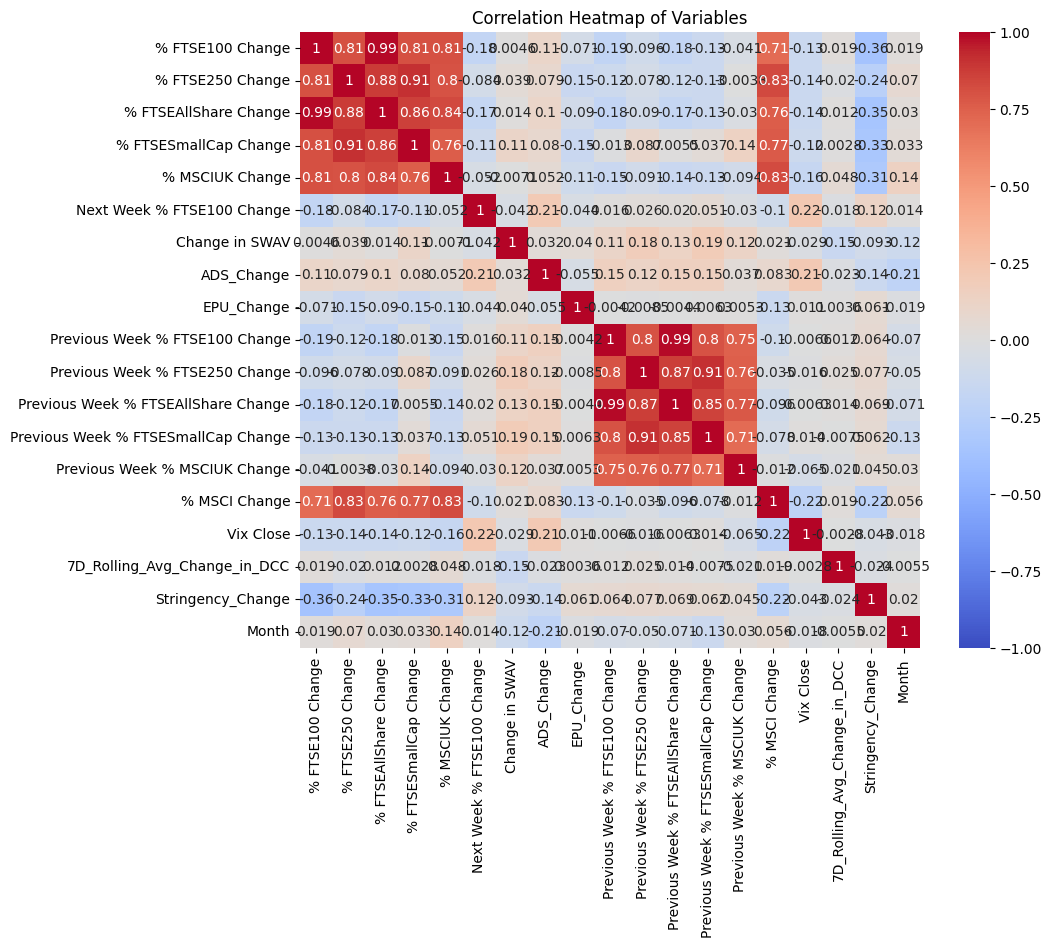

In [419]:
# Explore Data

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['Date']).corr()


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Variables')
plt.show()

# **Basic Regression with No Controlling Variables**

In [420]:
# Define dependent and independent variables

#  Define the dependent variable
y = df[ '% FTSE100 Change' ]

# Define the independent variable as 'Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify' Only
X = df[[ 'Change in SWAV' ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [421]:
# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02126
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.884
Time:                        21:59:48   Log-Likelihood:                -2387.6
No. Observations:                1025   AIC:                             4779.
Df Residuals:                    1023   BIC:                             4789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0519      0.078      0.

## Findings

**Low Explanatory Power:** The model has an R-squared of 0.006, indicating a poor fit.

**Significant Negative Effect:** Change in SWAV significantly decreases FTSE 100 change (coefficient = -11.5132, p < 0.001).

**Model Significance:** The model is statistically significant (F-statistic = 24.10, p < 0.001).

**Non-Significant Intercept:** The constant term is not significant (p = 0.508).

**Residual Issues:** Residuals show non-normality and autocorrelation, indicating model assumption problems.

# **Basic Regression with All Controlling Variables**




In [422]:
import pandas as pd
import statsmodels.api as sm

# Define the dependent variable
y = df['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV',                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         'ADS_Change',                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         'EPU_Change',                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         'Previous Week % FTSE100 Change',          # Control 3: Weekly % Change in FTSE 100 from a week before
         '% MSCI Change',                           # Control 4: Weekly % Change in MSCI World Index
         'Vix Close',                               # Control 5: Volaitlity Index of the day
         '7D_Rolling_Avg_Change_in_DCC',            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         'Stringency_Change'                        # Control 7: Weekly Change in Covid Stringency Rules
]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          6.41e-178
Time:                        21:59:48   Log-Likelihood:                -1960.7
No. Observations:                1025   AIC:                             3939.
Df Residuals:                    1016   BIC:                             3984.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Findings

**Good Fit**: The model has a high explanatory power with an **R-squared of 0.688**, indicating it explains **68.8% of the variance** in FTSE 100 changes.

### Significant Predictors:
- **Change in SWAV**: Significant negative effect (**coefficient = -6.7969**, **p < 0.001**).
- **ADS_Change**: Significant positive effect (**coefficient = 0.3047**, **p < 0.001**).
- **Previous Week % FTSE100 Change**: Significant negative effect (**coefficient = -0.1507**, **p < 0.001**).
- **% MSCI Change**: Significant positive effect (**coefficient = 0.6873**, **p < 0.001**).
- **Vix Close**: Significant negative effect (**coefficient = -0.0358**, **p < 0.001**).

### Insignificant Predictors:
- **EPU_Change**: Not significant (**p = 0.955**).
- **7D_Rolling_Avg_Change_in_DCC**: Marginally significant (**p = 0.064**).
- **Stringency_Change**: Not significant (**p = 0.782**).


**Model Significance**: The overall model is highly significant (**F-statistic = 1014**, **p < 0.001**).

**Residual Diagnostics**: Residuals show slight skewness and kurtosis, with a **Durbin-Watson statistic of 0.098** indicating potential autocorrelation issues.


# **Basic Regression without MSCI as a Control**

In [423]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         #, '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     36.41
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.33e-45
Time:                        21:59:48   Log-Likelihood:                -2273.0
No. Observations:                1025   AIC:                             4562.
Df Residuals:                    1017   BIC:                             4601.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **Basic Regression with all Controls for Next Week's FTSE Change**

In [424]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['Next Week % FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Next Week % FTSE100 Change   R-squared:                       0.106
Model:                                    OLS   Adj. R-squared:                  0.099
Method:                         Least Squares   F-statistic:                     15.06
Date:                        Sat, 10 Aug 2024   Prob (F-statistic):           5.21e-21
Time:                                21:59:48   Log-Likelihood:                -2317.8
No. Observations:                        1025   AIC:                             4654.
Df Residuals:                            1016   BIC:                             4698.
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# **Basic Regression with all controls for 2017-2020**

In [425]:
# Define dependent and independent variables

# Define the start and end dates for the filter
start_date = '2017-01-01'
end_date = '2020-12-31'

# Filter the DataFrame for dates within the specified range
df_period1 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

#  Define the dependent variable
y = df_period1['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period1[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                  , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                  , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                  , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                  , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                  , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                  , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                  , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                  ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          9.42e-113
Time:                        21:59:48   Log-Likelihood:                -1129.1
No. Observations:                 589   AIC:                             2276.
Df Residuals:                     580   BIC:                             2316.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **Basic Regression with all controls for 2021-2023**

In [426]:
# Define dependent and independent variables

# Define the start and end dates for the filter
start_date = '2021-01-01'
end_date = '2023-12-31'

# Filter the DataFrame for dates within the specified range
df_period2 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

#  Define the dependent variable
y = df_period2['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     67.89
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.38e-71
Time:                        21:59:48   Log-Likelihood:                -798.12
No. Observations:                 436   AIC:                             1614.
Df Residuals:                     427   BIC:                             1651.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **FTSE250**

In [427]:
# Define dependent and independent variables

#  Define the dependent variable
y = df_period2['% FTSE250 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % FTSE250 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE250 Change   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          5.38e-108
Time:                        21:59:48   Log-Likelihood:                -890.09
No. Observations:                 436   AIC:                             1798.
Df Residuals:                     427   BIC:                             1835.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **FTSE All Share**

In [428]:
# Define dependent and independent variables

#  Define the dependent variable
y = df_period2['% FTSEAllShare Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % FTSEAllShare Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     % FTSEAllShare Change   R-squared:                       0.632
Model:                               OLS   Adj. R-squared:                  0.625
Method:                    Least Squares   F-statistic:                     91.79
Date:                   Sat, 10 Aug 2024   Prob (F-statistic):           7.20e-88
Time:                           21:59:48   Log-Likelihood:                -773.19
No. Observations:                    436   AIC:                             1564.
Df Residuals:                        427   BIC:                             1601.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

# **Small Cap**

In [429]:
# Define dependent and independent variables

#  Define the dependent variable
y = df_period2['% FTSESmallCap Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % FTSESmallCap Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     % FTSESmallCap Change   R-squared:                       0.659
Model:                               OLS   Adj. R-squared:                  0.653
Method:                    Least Squares   F-statistic:                     103.3
Date:                   Sat, 10 Aug 2024   Prob (F-statistic):           6.47e-95
Time:                           21:59:48   Log-Likelihood:                -765.69
No. Observations:                    436   AIC:                             1549.
Df Residuals:                        427   BIC:                             1586.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

# **MSCIUK**

In [430]:
# Define dependent and independent variables

#  Define the dependent variable
y = df_period2['% MSCIUK Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % MSCIUK Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        % MSCIUK Change   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          3.99e-109
Time:                        21:59:48   Log-Likelihood:                -894.32
No. Observations:                 436   AIC:                             1807.
Df Residuals:                     427   BIC:                             1843.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         